# Analysis on Price Elasticity

## Exploratory Data Analysis
When approaching a data mining problem, a data mining analyst will have a priori hypothesis (one formed beforehand) that he or she would like to test regarding the relationships between variables. However, analysts do not always have these notions of the expected relationships among variables. When given an unknown large database, analysts often prefer to use Exploratory Data Analysis(EDA) or graphical analysis to understand the data.

### EDA 
Allows the analyst to identify the interesting subsets of the observations
and develop an initial idea of possible associations among the predictors, as well as between the predictors and target variable.

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
ecom_data = pd.read_csv('DatafinitiElectronicsProductsPricingData.csv')

In [3]:
ecom_data.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,NaN,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds


In [4]:
#Summarize the dataset
# Provides the number of rows and columns in a dataset. There are 26 columns in ecom_data dataset and a total of 7249 records.
ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 26 columns):
id                     7249 non-null object
prices.amountMax       7249 non-null float64
prices.amountMin       7249 non-null float64
prices.availability    7249 non-null object
prices.condition       7249 non-null object
prices.currency        7249 non-null object
prices.dateSeen        7249 non-null object
prices.isSale          7249 non-null bool
prices.merchant        7249 non-null object
prices.shipping        4277 non-null object
prices.sourceURLs      7249 non-null object
asins                  7249 non-null object
brand                  7249 non-null object
categories             7249 non-null object
dateAdded              7249 non-null object
dateUpdated            7249 non-null object
ean                    1543 non-null object
imageURLs              7249 non-null object
keys                   7249 non-null object
manufacturer           3235 non-null object
manufacturerN

EAN - The EAN codes for this product. There may be more than one EAN in the list when a product has multiple variations,
each using a different EAN.
> we can drop the column since there will be no impact on the data modeling.

In [5]:
print(ecom_data.shape)

(7249, 26)


In [6]:
ecom_data.describe()

,prices.amountMax,prices.amountMin
count,7249.000000,7249.000000
mean,495.530610,463.963005
std,763.599387,680.504507
min,1.000000,1.000000
25%,79.990000,79.950000
50%,198.990000,189.990000
75%,494.990000,479.990000
max,6999.990000,5999.990000


In [7]:
ecom_data.isnull().sum()

id                        0
prices.amountMax          0
prices.amountMin          0
prices.availability       0
prices.condition          0
prices.currency           0
prices.dateSeen           0
prices.isSale             0
prices.merchant           0
prices.shipping        2972
prices.sourceURLs         0
asins                     0
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
ean                    5706
imageURLs                 0
keys                      0
manufacturer           4014
manufacturerNumber        0
name                      0
primaryCategories         0
sourceURLs                0
upc                       0
weight                    0
dtype: int64

### Analysis to be done to determine if the missing value columns are to be included in further analysis or not.

> as per the https://developer.datafiniti.co/docs/product-data-schema description, prices.shipping is The shipping terms associated with this price. and if we see, the values include "FREE shipping" 

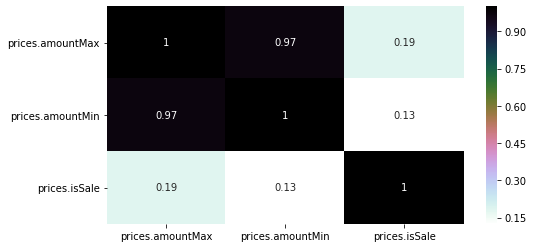

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(ecom_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [9]:
ecom_data_new = ecom_data[['prices.amountMax','prices.amountMin','prices.condition','prices.isSale','prices.merchant','dateAdded','brand','manufacturer','name','primaryCategories']]

In [10]:
ecom_data_new.head()

,prices.amountMax,prices.amountMin,prices.condition,prices.isSale,prices.merchant,dateAdded,brand,manufacturer,name,primaryCategories
0,104.99,104.99,New,False,Bestbuy.com,2015-04-13T12:00:51Z,Sanus,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics
1,69.00,64.99,New,True,Walmart.com,2015-05-18T14:14:56Z,Boytone,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics
2,69.00,69.00,New,False,Walmart.com,2015-05-18T14:14:56Z,Boytone,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics
3,69.99,69.99,New,False,Bestbuy.com,2015-05-18T14:14:56Z,Boytone,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics
4,66.99,66.99,New,False,Bestbuy.com,2015-05-18T14:14:56Z,Boytone,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics


In [11]:
ecom_data_new.info()

def removeAfterComma(string):
    """
    input is a string 
    output is a string with everything after comma removed
    """
    return string.split('T')[0].strip()
ecom_data_new.dateAdded = ecom_data_new.dateAdded.apply(removeAfterComma)
ecom_data_new.head()

#Reference ataken from 
#https://stackoverflow.com/questions/36300158/python-split-text-after-the-second-occurrence-of-character
def hyphen_split(a):
    if a.count("-") == 1:
        return a.split("-")[0]
    else:
        return "-".join(a.split("-", 2)[:2])
    
ecom_data_new.dateAdded = ecom_data_new.dateAdded.apply(hyphen_split)
ecom_data_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 10 columns):
prices.amountMax     7249 non-null float64
prices.amountMin     7249 non-null float64
prices.condition     7249 non-null object
prices.isSale        7249 non-null bool
prices.merchant      7249 non-null object
dateAdded            7249 non-null object
brand                7249 non-null object
manufacturer         3235 non-null object
name                 7249 non-null object
primaryCategories    7249 non-null object
dtypes: bool(1), float64(2), object(7)
memory usage: 516.9+ KB


,prices.amountMax,prices.amountMin,prices.condition,prices.isSale,prices.merchant,dateAdded,brand,manufacturer,name,primaryCategories
0,104.99,104.99,New,False,Bestbuy.com,2015-04,Sanus,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics
1,69.00,64.99,New,True,Walmart.com,2015-05,Boytone,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics
2,69.00,69.00,New,False,Walmart.com,2015-05,Boytone,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics
3,69.99,69.99,New,False,Bestbuy.com,2015-05,Boytone,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics
4,66.99,66.99,New,False,Bestbuy.com,2015-05,Boytone,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics


In [12]:
ecom_data_new.isnull().sum()
# Since manufacturer and brand are the same, we can remove the manufacturer column

prices.amountMax        0
prices.amountMin        0
prices.condition        0
prices.isSale           0
prices.merchant         0
dateAdded               0
brand                   0
manufacturer         4014
name                    0
primaryCategories       0
dtype: int64

In [13]:
ecom_data_new = ecom_data_new.drop(['manufacturer'], axis=1)

> We will be converting the columns values price.condition and price.isSale from string to boolean value 1 for True and 0 for False for easy manipulations and calculations

In [14]:
ecom_data_new.groupby('prices.merchant').size()
# By sorting the data we can find the sources from which customers by most of the item and hearby removing the onces that wont impact our model.
ecom_data_new.groupby('prices.merchant').size().sort_values(ascending=False)

prices.merchant
Bestbuy.com                             2806
bhphotovideo.com                        1509
Walmart.com                              664
Beach Camera                             201
AMI Ventures Inc                          63
buydig                                    53
Focus Camera                              48
gear4less                                 43
echo-and-optics                           40
Beach Audio Inc                           39
Best Buy                                  38
UnbeatableSale                            33
DealClock                                 32
electronic_express                        28
World Wide Stereo                         28
BuyVPC                                    27
Electronics Expo (Authorized Dealer)      26
Car Audio Closeout                        24
Video & Audio Center                      19
OneCall                                   18
Electronic Express                        17
wwstereo                               

In [15]:
output = ecom_data_new.groupby('prices.merchant').size().sort_values(ascending=False)

In [16]:
threshold_output = output[output>15]
threshold_output

prices.merchant
Bestbuy.com                             2806
bhphotovideo.com                        1509
Walmart.com                              664
Beach Camera                             201
AMI Ventures Inc                          63
buydig                                    53
Focus Camera                              48
gear4less                                 43
echo-and-optics                           40
Beach Audio Inc                           39
Best Buy                                  38
UnbeatableSale                            33
DealClock                                 32
electronic_express                        28
World Wide Stereo                         28
BuyVPC                                    27
Electronics Expo (Authorized Dealer)      26
Car Audio Closeout                        24
Video & Audio Center                      19
OneCall                                   18
Electronic Express                        17
wwstereo                               

> We have taken the websites from where people have purchased more than 15 times as per the data present in the data frame

In [17]:
values = ['Bestbuy.com','bhphotovideo.com','Walmart.com,Beach Camera','AMI Ventures Inc','buydig','Focus Camera','gear4less','echo-and-optics','Beach Audio Inc','Best Buy','UnbeatableSale','DealClock','electronic_express','World Wide Stereo','BuyVPC','Electronics Expo (Authorized Dealer)','Car Audio Closeout','Video & Audio Center','OneCall','Electronic Express','wwstereo']

In [18]:
ecom_data_upd = ecom_data_new.loc[ecom_data_new['prices.merchant'].isin(values)]
#ecom_data_upd['brand']

In the above code, We took the values that we got from filtering out the purchase count having more than 15 for each website.
<p>
    Below we have replaced some column values to make the data clean and have distinct row values.


In [19]:
ecom_data_upd[['prices.merchant']] = ecom_data_upd[['prices.merchant']].replace(['Best Buy'], ['Bestbuy.com'])
ecom_data_upd.groupby('prices.merchant').size().sort_values(ascending=False)

prices.merchant
Bestbuy.com                             2844
bhphotovideo.com                        1509
AMI Ventures Inc                          63
buydig                                    53
Focus Camera                              48
gear4less                                 43
echo-and-optics                           40
Beach Audio Inc                           39
UnbeatableSale                            33
DealClock                                 32
electronic_express                        28
World Wide Stereo                         28
BuyVPC                                    27
Electronics Expo (Authorized Dealer)      26
Car Audio Closeout                        24
Video & Audio Center                      19
OneCall                                   18
Electronic Express                        17
wwstereo                                  16
dtype: int64

Performed some more data cleansing and manipulation below by replacing certain row values to a more generalized value.

In [20]:
#print(ecom_data_upd[['prices.condition','prices.isSale']])
print(ecom_data_upd.groupby('prices.condition').size().sort_values(ascending=False))
print(ecom_data_upd.groupby('prices.isSale').size().sort_values(ascending=False))
#change the values of the column to Used which are not new
ecom_data_upd[['prices.condition']] = ecom_data_upd[['prices.condition']].replace(['new'], ['New'])
ecom_data_upd[['prices.condition']] = ecom_data_upd[['prices.condition']].replace(['New other (see details)'], ['Used'])
ecom_data_upd[['prices.condition']] = ecom_data_upd[['prices.condition']].replace(['Refurbished'], ['Used'])
ecom_data_upd[['prices.condition']] = ecom_data_upd[['prices.condition']].replace(['pre-owned'], ['Used'])
ecom_data_upd[['prices.condition']] = ecom_data_upd[['prices.condition']].replace(['refurbished'], ['Used'])
ecom_data_upd[['prices.condition']] = ecom_data_upd[['prices.condition']].replace(['Manufacturer refurbished'], ['Used'])
print(ecom_data_upd.groupby('prices.condition').size().sort_values(ascending=False))

ecom_data_upd['prices.condition'] = ecom_data_upd['prices.condition'].astype(str)
ecom_data_upd['prices.isSale'] = ecom_data_upd['prices.isSale'].astype(str)
ecom_data_upd.info()
ecom_data_upd['cond_sale'] = ecom_data_upd['prices.condition'] + '_' + ecom_data_upd['prices.isSale']
#df['AllTogether'] = df['Country'].str.cat(df[['State', 'City']], sep=' - ')
#ecom_data_upd['cond_sale'] = ecom_data_upd['prices.condition'].str.cat(ecom_data_upd['prices.isSale'].str, sep ='_')
##print(ecom_data_upd['cond_sale'])
ecom_data_upd = ecom_data_upd.drop(['prices.condition'], axis=1)
ecom_data_upd = ecom_data_upd.drop(['prices.isSale'], axis=1)
ecom_data_upd.info()

prices.condition
New                         4143
new                          665
Used                          65
New other (see details)       16
Refurbished                   11
pre-owned                      3
refurbished                    2
Manufacturer refurbished       2
dtype: int64
prices.isSale
False    3755
True     1152
dtype: int64
prices.condition
New     4808
Used      99
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4907 entries, 0 to 7247
Data columns (total 9 columns):
prices.amountMax     4907 non-null float64
prices.amountMin     4907 non-null float64
prices.condition     4907 non-null object
prices.isSale        4907 non-null object
prices.merchant      4907 non-null object
dateAdded            4907 non-null object
brand                4907 non-null object
name                 4907 non-null object
primaryCategories    4907 non-null object
dtypes: float64(2), object(7)
memory usage: 383.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4907 

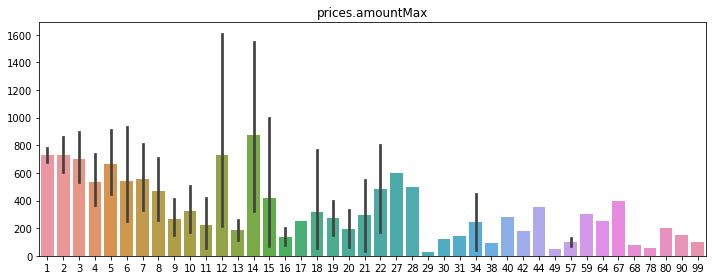

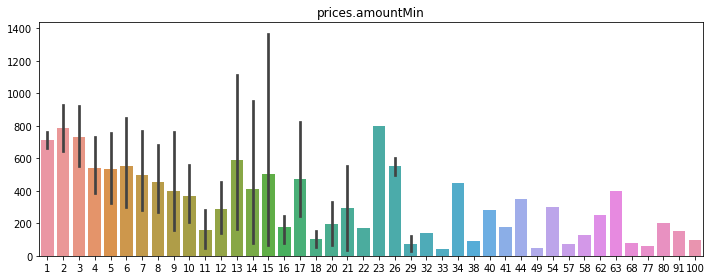

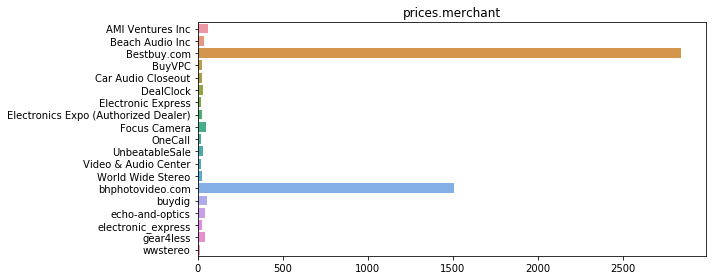

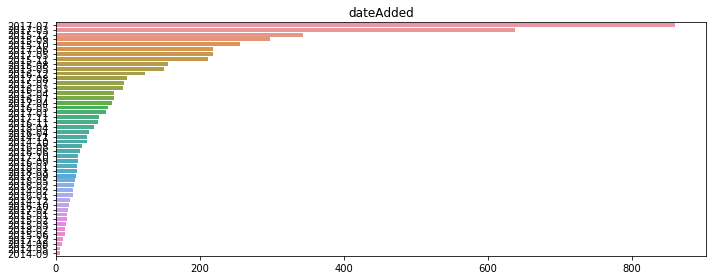

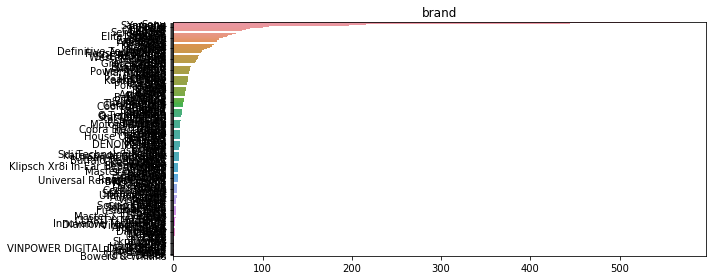

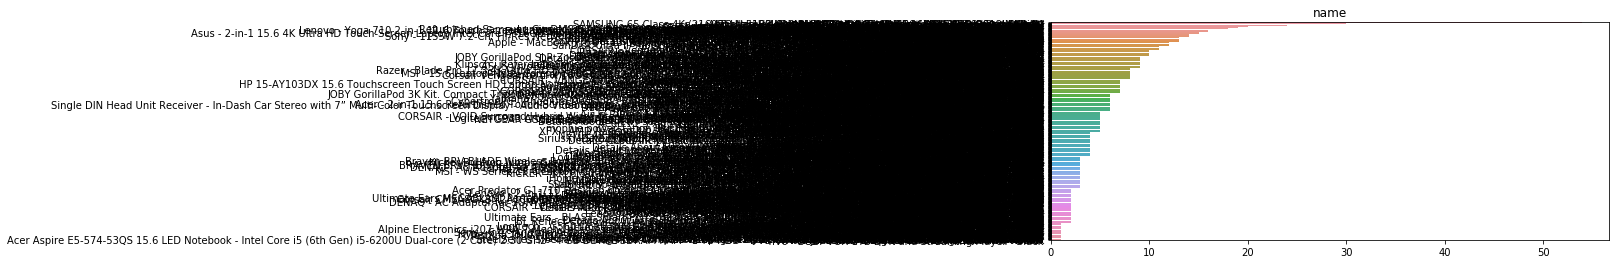

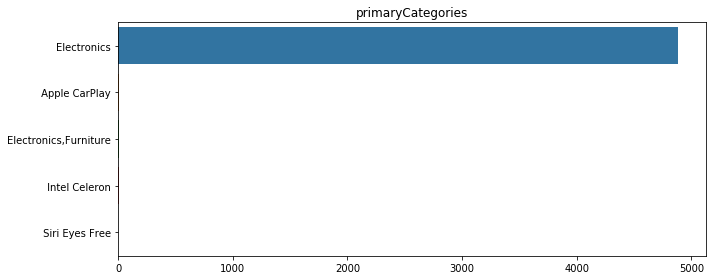

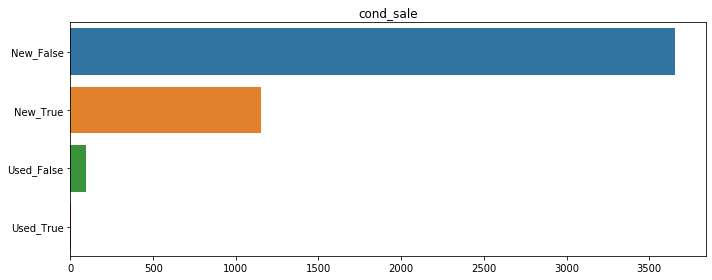

In [21]:
for col in ['prices.merchant']:
    ecom_data_upd[col] = ecom_data_upd[col].astype('category')

for col1 in ecom_data_upd:
    plt.figure(figsize=(10,4))
    sns.barplot(ecom_data_upd[col1].value_counts().values, ecom_data_upd[col1].value_counts().index)
    plt.title(col1)
    plt.tight_layout()
    
    

We can infer from the above graphs -
<p> Pattern among the pricing that the companies do not provide discount on the most of the new products and provide ZERO discounts on the used products.
<p> 

In [22]:
ecom_data_upd.head(10)
for col in ['prices.merchant']:
    ecom_data_upd[col] = ecom_data_upd[col].astype('int8')

ValueError: invalid literal for int() with base 10: 'Bestbuy.com'

In [23]:
ecom_data_upd.corr()


dict ={'Bestbuy.com' : '1',
'bhphotovideo.com': '2',
'Walmart.com': '3',
'Beach Camera': '4',
'AMI Ventures Inc': '5'
,'buydig': '6'
,'Focus Camera': '7'
,'gear4less': '8'
,'echo-and-optics': '9'
,'Beach Audio Inc': '10'
,'UnbeatableSale': '11'
,'DealClock': '12'
,'electronic_express': '13'
,'World Wide Stereo': '14'
,'BuyVPC': '15'
,'Electronics Expo (Authorized Dealer)': '16'
,'Car Audio Closeout': '17'
,'Video & Audio Center': '18'
,'OneCall': '19'
,'Electronic Express': '19',
'wwstereo': '20'}

  
# Print the dictionary 
print(dict) 
  
# Remap the values of the dataframe 
ecom_data_upd['prices.merchant']= ecom_data_upd['prices.merchant'].map(dict) 
  
# Print the DataFrame after modification 
print(ecom_data_upd)

ecom_data_upd.info()

{'Bestbuy.com': '1', 'bhphotovideo.com': '2', 'Walmart.com': '3', 'Beach Camera': '4', 'AMI Ventures Inc': '5', 'buydig': '6', 'Focus Camera': '7', 'gear4less': '8', 'echo-and-optics': '9', 'Beach Audio Inc': '10', 'UnbeatableSale': '11', 'DealClock': '12', 'electronic_express': '13', 'World Wide Stereo': '14', 'BuyVPC': '15', 'Electronics Expo (Authorized Dealer)': '16', 'Car Audio Closeout': '17', 'Video & Audio Center': '18', 'OneCall': '19', 'Electronic Express': '19', 'wwstereo': '20'}
      prices.amountMax  prices.amountMin prices.merchant dateAdded  \
0               104.99            104.99               1   2015-04   
3                69.99             69.99               1   2015-05   
4                66.99             66.99               1   2015-05   
7                65.99             65.99               1   2015-05   
10               69.99             69.99               1   2015-05   
12               64.99             64.99               1   2015-05   
13            

In [27]:
for col in ['prices.merchant']:
    ecom_data_upd[col] = ecom_data_upd[col].astype('int8')
    
ecom_data_upd.corr()

,prices.amountMax,prices.amountMin,prices.merchant
prices.amountMax,1.000000,0.994230,0.144355
prices.amountMin,0.994230,1.000000,0.123575
prices.merchant,0.144355,0.123575,1.000000


In [35]:
new_data = ecom_data_upd[["prices.amountMax","prices.amountMin","prices.merchant"]]
new_data.info()

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4907 entries, 0 to 7247
Data columns (total 3 columns):
prices.amountMax    4907 non-null float64
prices.amountMin    4907 non-null float64
prices.merchant     4907 non-null int8
dtypes: float64(2), int8(1)
memory usage: 119.8 KB


In [36]:
x = new_data[new_data.columns.difference(['prices.merchant'])]
y = new_data['prices.merchant']
x, y = ros.fit_sample(x, y)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)
x = scaler.fit_transform(x)

[ 0  0  0 ... 17 17 17]


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)
x = scaler.fit_transform(x)

[ 0  0  0 ... 17 17 17]


In [43]:
#checking the shapes
print("x:", x.shape)
print("y:", y.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# checking the shapes

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

x: (51192, 2)
y: (51192,)
Shape of x_train: (35834, 2)
Shape of y_train: (35834,)
Shape of x_test: (15358, 2)
Shape of y_test: (15358,)


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8363844393592678
Testing Accuracy : 0.8193124104701133
[[672  91  10   5   9   3   3   1   1   4  19   3   9  18  46   1   2   2]
 [204 423   3  32  21   4   7   3   0   6  20  25   6  24  15  30  14  41]
 [  0   0 860   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 361  16   0   0   0   0   0 115  29   0  36   0  58  99 118]
 [ 13   0   0  19 658  17   0   0   0   0  35  41  19  13   0  40   0   0]
 [  0   0   0   0   0 741 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  92 699   0   0   0  42   0   0   0   0  24   0   0]
 [ 27   0   0   0   0   0   0 795   0   0   0   0   0  21  22   0   0   0]
 [ 26   0   0   0   0   0   0   0 766   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 811   0  22   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 488  41   0   0   0 142  68 162]
 [  0   0   0   0   0   0   0   0   0   0   0 704   0  52   0  58   0  74]
 [  0   0   0   0   0  

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8348216777362282
Testing Accuracy : 0.8213960151061336
[[644 100  11   5   9   3   4   1  18   4  19   4   9  18  46   1   2   1]
 [204 409   5  33  21   4   7   3  11   6  20  27   6  24  15  30  14  39]
 [  0   0 860   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 361  16   0   0   0   0   0 133  29   0  36   0  58  81 118]
 [  0   0   0  19 658  17   0   0  13   0  35  41  19  13   0  40   0   0]
 [  0   0   0   0   0 702 146   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  48 743   0   0   0  42   0   0   0   0  24   0   0]
 [ 27   0   0   0   0   0   0 795   0   0   0   0   0  21  22   0   0   0]
 [  0   0   0   0   0   0   0   0 792   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 811   0  22   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 523  41   0   0   0 142  33 162]
 [  0   0   0   0   0   0   0   0   0   0   0 778   0  52   0  58   0   0]
 [  0   0   0   0   0  

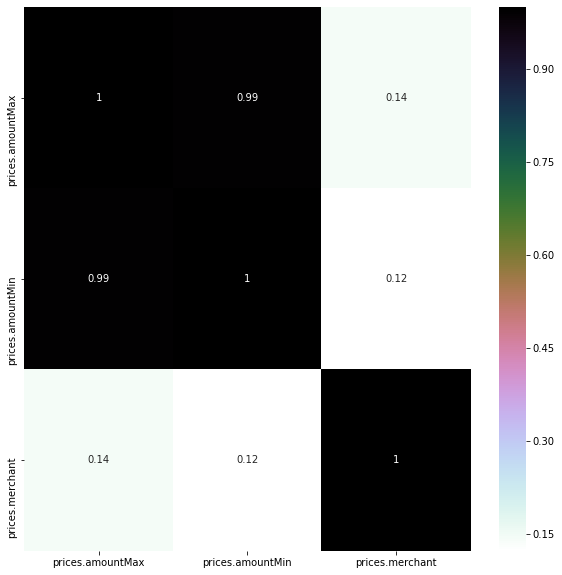

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [47]:
ecom_data_upd.to_csv("D:\\kddproject.csv")